In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### **Filters with OpenCV**

In [2]:
import requests

image_url = "https://media.geeksforgeeks.org/wp-content/uploads/gray.jpeg"

img_data = requests.get(image_url).content
with open('image.jpg', 'wb') as f:
    f.write(img_data)

1) Convertiamo l'immagine in grayscale

In [3]:
image = cv2.imread('image.jpg')
gray_image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

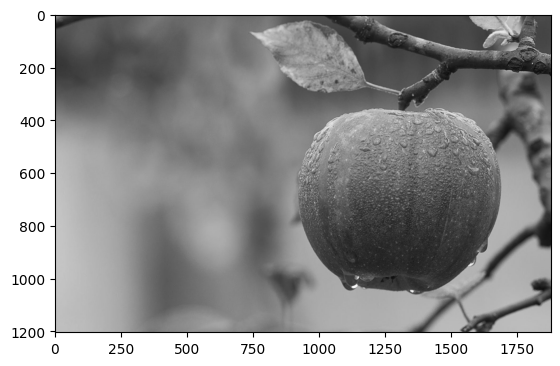

In [4]:
plt.imshow(gray_image, cmap="gray")

In [5]:
filt_image = cv2.medianBlur(gray_image, 13)

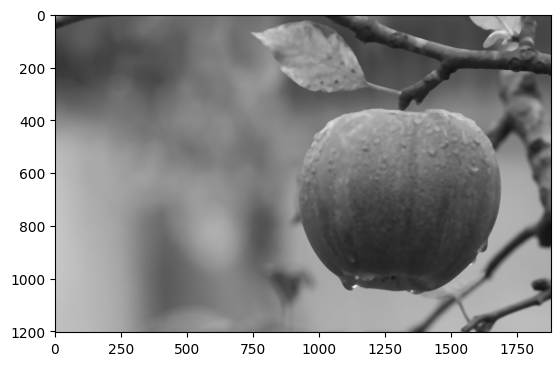

In [6]:
plt.imshow(filt_image, cmap="gray")

In [18]:
import cv2
import numpy as np

def mean_blur(image: np.array, k: int) -> np.array:
  kernel = np.ones((k, k), np.float32) / (k*k)
  out = cv2.filter2D(image, -1, kernel)
  return out

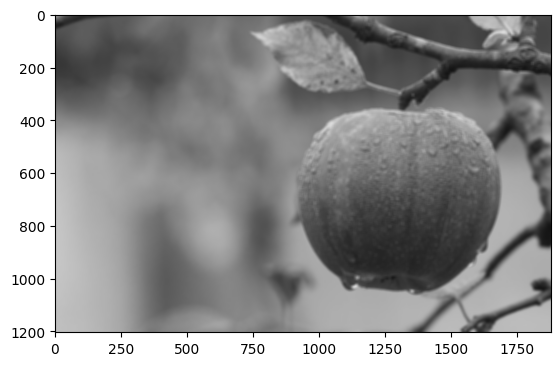

In [19]:
blur_image = mean_blur(gray_image, 13)
plt.imshow(blur_image, cmap="gray")

### **Filtro di Sobel**

#### **ddepth**

Desired depth (data type) of the output image

Choosing ddepth:

* If the input image is 8-bit (which is common), the Sobel derivatives can have negative values and may exceed the range of 8-bit integers.

* To handle the larger range of derivative values, it is often useful to use a depth of cv2.CV_16S, cv2.CV_32F, or cv2.CV_64F.
Typical Use Cases:

Altre info:
* 8-bit Unsigned Output (cv2.CV_8U): Suitable when you want to keep the output image within the 8-bit range, but may lead to loss of negative gradient information.

* 16-bit Signed Output (cv2.CV_16S): Allows capturing the negative gradients, suitable for more precise edge detection.

* 32-bit/64-bit Floating Point (cv2.CV_32F, cv2.CV_64F): Provides the highest precision, useful for further mathematical operations and when very fine details are important.


#### **dx and dy**
* dx: order of the derivative in the x-direction.
* dx=1 computes the first-order derivative in the x-direction, dx=0 means no derivative in the x-direction.


* dy: order of the derivative in the y-direction.
* dy=1 computes the first-order derivative in the y-direction, dy=0 means no derivative in the y-direction.

#### **ksize**
Size of the extended Sobel kernel.

* Common Values: 1, 3, 5, 7, etc. (must be odd).
* Larger values increase the size of the kernel, leading to smoother results but potentially losing finer details

In [ ]:
sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=image, ddepth=cv2.CV_8U, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis

In [ ]:
sobel_image = sobelx + sobely

In [ ]:
sobel_image.max(), sobel_image.min()

(255, 0)

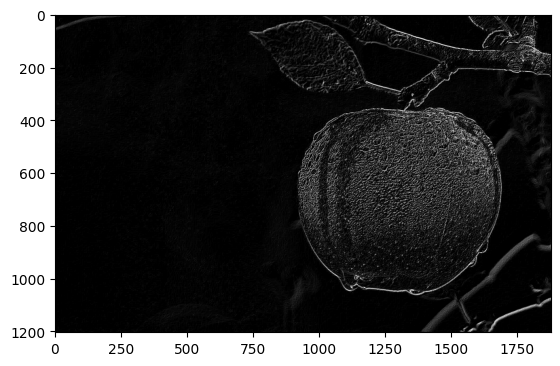

In [ ]:
plt.imshow(sobel_image, cmap="gray")

#### **Prewitt**

Prewitt kernel:

* asse x = [[1,1,1],[0,0,0],[-1,-1,-1]]
* asse y = [[-1,0,1],[-1,0,1],[-1,0,1]]

In [ ]:
# prewitt kernel
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [13]:
cv2.CV_8U

0

In [ ]:
prewittx = cv2.filter2D(image, cv2.CV_8U, kernelx)
prewitty = cv2.filter2D(image, cv2.CV_8U, kernely)

In [ ]:
prewitt_image = prewittx + prewitty

In [ ]:
prewitt_image.max(), prewitt_image.min()

(255, 0)

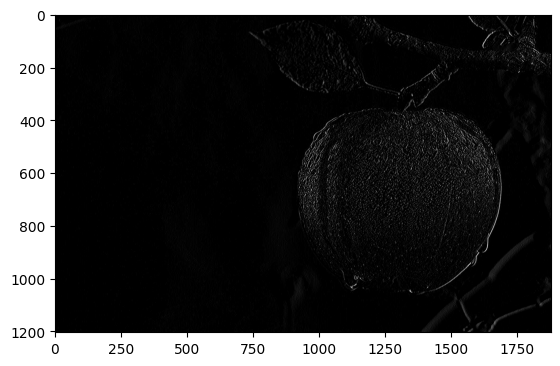

In [ ]:
plt.imshow(prewitt_image, cmap="gray")

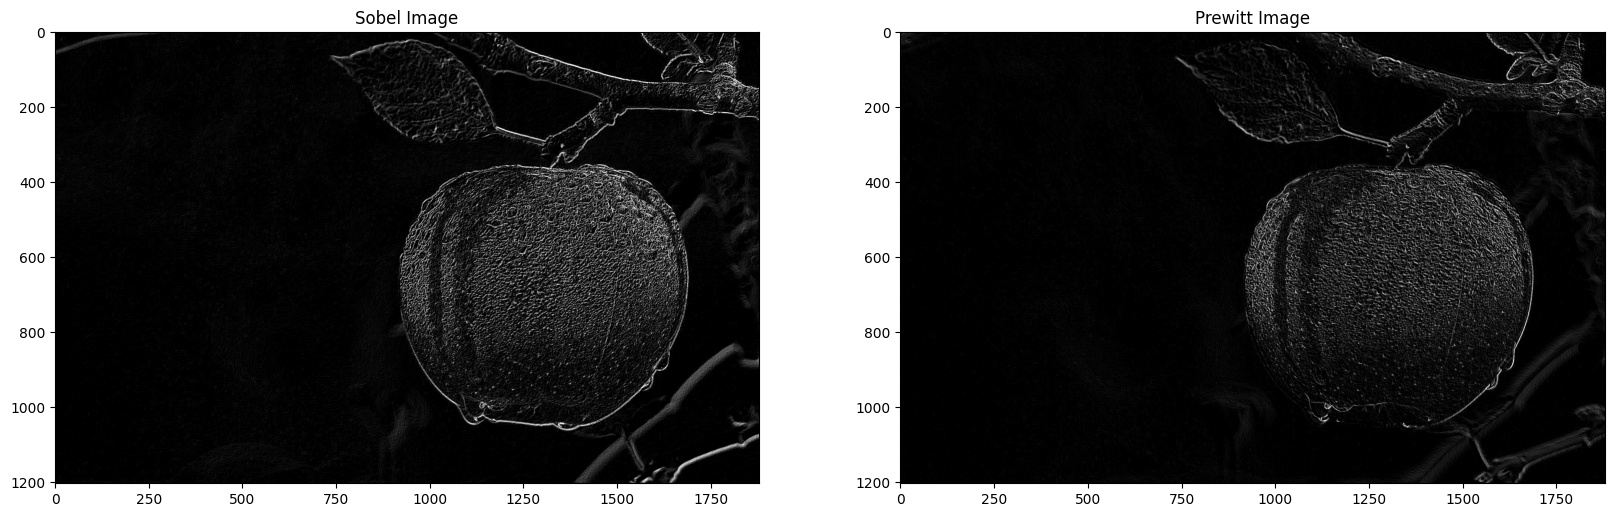

In [ ]:
plt.figure(figsize=(20, 16))

plt.subplot(1, 2, 1)
plt.title('Sobel Image')
plt.imshow(sobel_image)  # Convert BGR to RGB for correct display with matplotlib

plt.subplot(1, 2, 2)
plt.title('Prewitt Image')
plt.imshow(prewitt_image)

plt.show()